In [209]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

groundTruth_Users = os.listdir("groundTruth")
MyoData_Users = os.listdir("MyoData")

user_id = []
for i in range(len(MyoData_Users)):
    if MyoData_Users[i] in groundTruth_Users:
        user_id.append(MyoData_Users[i])

In [109]:
def get_clean_paths(user, fork_or_spoon= 'fork'):
    parent_path = "clean_data/" + user + '/' + fork_or_spoon
    #dir_list = os.listdir(parent_path)
    EMG_eating_txt_path = parent_path + "/" + "eating_EMG.txt"
    EMG_not_eating_txt_path = parent_path + "/" + "not_eating_EMG.txt"
    IMU_eating_txt_path = parent_path + "/" + "eating_IMU.txt"
    IMU_not_eating_txt_path = parent_path + "/" + "not_eating_IMU.txt"
    master_EMG_path = parent_path + "/" + "master_dfEMG.txt"
    master_IMU_path = parent_path + "/" + "master_dfIMU.txt"
    return (master_EMG_path, EMG_eating_txt_path, EMG_not_eating_txt_path, master_IMU_path, IMU_eating_txt_path, IMU_not_eating_txt_path)

def get_clean_df(user = "user10", data_for="EMG", fork_or_spoon="fork", eating=True, master=False):
    paths = get_clean_paths(user, fork_or_spoon)
    if data_for == "EMG":
        if master:
            return pd.read_csv(paths[0], sep=",", index_col=0)
        elif eating:
            return pd.read_csv(paths[1], sep=",", index_col=0)
        else:
            return pd.read_csv(paths[2], sep=",", index_col=0)

    elif( data_for == "IMU"):
        if master:
            return pd.read_csv(paths[3], sep=",", index_col=0)
        elif eating:
            return pd.read_csv(paths[4], sep=",", index_col=0)
        else:
            return pd.read_csv(paths[5], sep=",", index_col=0)
    

# RMS

In [110]:
# RMS_feature_extraction(df1,df2)
# RMS_feature_extraction(df1_IMU,df2_IMU)
def RMS_feature_extraction(df1,df2,col_wise=True,user="user10", get_feature_data=False):
    if col_wise:
        axis = 0
        n = (df1.iloc[:,1:-1]).shape[0]
    else:
        axis = 1 
        n = (df1.iloc[:,1:-1]).shape[1]
    if get_feature_data:
        eating_feature_data = ((((df1.iloc[:,1:-1]**2).sum(axis))/n).pow(1/2))
        non_eating_feature_data = (((df2.iloc[:,1:-1]**2).sum(axis)/n).pow(1/2))
        return ( (pd.DataFrame(eating_feature_data)).T, (pd.DataFrame(non_eating_feature_data)).T )
    
    try:
        ax = ((((df1.iloc[:,1:-1]**2).sum(axis))/n).pow(1/2)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]**2).sum(axis)/n).pow(1/2).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in RMS_feature_extraction()")

# avg

In [111]:
# AVG_feature_extraction(df1,df2)
# AVG_feature_extraction(df1_IMU,df2_IMU)
def AVG_feature_extraction(df1,df2,col_wise=True,user="user10", get_feature_data=False):
    if col_wise:
        axis = 0
    else:
        axis = 1 
    if get_feature_data:
        eating_feature_data = ((df1.iloc[:,1:-1]).abs().mean(axis))
        non_eating_feature_data = ((df2.iloc[:,1:-1]).abs().mean(axis))
        return ( (pd.DataFrame(eating_feature_data)).T, (pd.DataFrame(non_eating_feature_data)).T )
    
    try:
        ax = ((df1.iloc[:,1:-1]).abs().mean(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).abs().mean(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

# min

In [112]:
# MIN_feature_extraction(df1,df2)
def MIN_feature_extraction(df1,df2,col_wise=True,user="user10", get_feature_data=False):
    if col_wise:
        axis = 0
    else:
        axis = 1 
    if get_feature_data:
        eating_feature_data = ((df1.iloc[:,1:-1]).min(axis))
        non_eating_feature_data = ((df2.iloc[:,1:-1]).min(axis))
        return ( (pd.DataFrame(eating_feature_data)).T, (pd.DataFrame(non_eating_feature_data)).T )
    
    try:
        ax = ((df1.iloc[:,1:-1]).min(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).min(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in MIN_feature_extraction()")

# max

In [113]:
# MAX_feature_extraction(df1,df2)
# MAX_feature_extraction(df1_IMU,df2_IMU)
def MAX_feature_extraction(df1,df2,col_wise=True,user="user10", get_feature_data=False):
    if col_wise:
        axis = 0
    else:
        axis = 1 
        
    if get_feature_data:
        eating_feature_data = ((df1.iloc[:,1:-1]).abs().max(axis))
        non_eating_feature_data = ((df2.iloc[:,1:-1]).abs().max(axis))
        return ( (pd.DataFrame(eating_feature_data)).T, (pd.DataFrame(non_eating_feature_data)).T )
    
    try:
        ax = ((df1.iloc[:,1:-1]).abs().max(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).abs().max(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

# std

In [114]:
# STD_feature_extraction(df1,df2)
# STD_feature_extraction(df1_IMU,df2_IMU)
def STD_feature_extraction(df1,df2,col_wise=True,user="user10", get_feature_data=False):
    if col_wise:
        axis = 0
    else:
        axis = 1 
        
    if get_feature_data:
        eating_feature_data = ((df1.iloc[:,1:-1]).std(axis))
        non_eating_feature_data = ((df2.iloc[:,1:-1]).std(axis))
        return ( (pd.DataFrame(eating_feature_data)).T, (pd.DataFrame(non_eating_feature_data)).T )
    
    try:
        ax = ((df1.iloc[:,1:-1]).std(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).std(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

In [218]:
feature_df = pd.DataFrame()

In [219]:
for user in user_id:

    df1 = get_clean_df(eating=True,user=user)
    df2 = get_clean_df(eating=False,user=user)
    #df1_IMU = get_clean_df(data_for="IMU",eating=True,user=user)
    #df2_IMU = get_clean_df(data_for="IMU",eating=False,user=user)

    (STD_eating_EMG, STD_non_eating_EMG) = STD_feature_extraction(df1,df2,col_wise=True,user=user,get_feature_data=True)
    (MAX_eating_EMG, MAX_non_eating_EMG) = MAX_feature_extraction(df1,df2,col_wise=True,user=user,get_feature_data=True)
    (MIN_eating_EMG, MIN_non_eating_EMG) = MIN_feature_extraction(df1,df2,col_wise=True,user=user,get_feature_data=True)
    (AVG_eating_EMG, AVG_non_eating_EMG) = AVG_feature_extraction(df1,df2,col_wise=True,user=user,get_feature_data=True)
    (RMS_eating_EMG, RMS_non_eating_EMG) = RMS_feature_extraction(df1,df2,col_wise=True,user=user,get_feature_data=True)

    STD_eating_EMG.columns = [str(col) + ' ' + 'STD' for col in STD_eating_EMG.columns]
    MAX_eating_EMG.columns = [str(col) + ' ' + 'MAX' for col in MAX_eating_EMG.columns]
    MIN_eating_EMG.columns = [str(col) + ' ' + 'MIN' for col in MIN_eating_EMG.columns]
    AVG_eating_EMG.columns = [str(col) + ' ' + 'AVG' for col in AVG_eating_EMG.columns]
    RMS_eating_EMG.columns = [str(col) + ' ' + 'RMS' for col in RMS_eating_EMG.columns]

    STD_non_eating_EMG.columns = [str(col) + ' ' + 'STD' for col in STD_non_eating_EMG.columns]
    MAX_non_eating_EMG.columns = [str(col) + ' ' + 'MAX' for col in MAX_non_eating_EMG.columns]
    MIN_non_eating_EMG.columns = [str(col) + ' ' + 'MIN' for col in MIN_non_eating_EMG.columns]
    AVG_non_eating_EMG.columns = [str(col) + ' ' + 'AVG' for col in AVG_non_eating_EMG.columns]
    RMS_non_eating_EMG.columns = [str(col) + ' ' + 'RMS' for col in RMS_non_eating_EMG.columns]

    #feature_df = STD_eating_EMG.append(MAX_eating_EMG)

    # feature_df = (STD_eating_EMG
    #     .append(MAX_eating_EMG)
    #     .append(MIN_eating_EMG)
    #     .append( AVG_eating_EMG)
    #     .append(RMS_eating_EMG)
    #     )
    eating_row = (STD_eating_EMG
                  .join(MAX_eating_EMG)
                  .join(MIN_eating_EMG)
                  .join(AVG_eating_EMG)
                  .join(RMS_eating_EMG)
                 )
    eating_row['eating'] = True
    feature_df = feature_df.append(eating_row,ignore_index=True)

    non_eating_row = (STD_non_eating_EMG
                  .join(MAX_non_eating_EMG)
                  .join(MIN_non_eating_EMG)
                  .join(AVG_non_eating_EMG)
                  .join(RMS_non_eating_EMG)
                 )
    non_eating_row['eating'] = False
    feature_df = feature_df.append(non_eating_row,ignore_index=True)

In [231]:
feature_df
backup_feature_df = feature_df
backup_feature_df.tail()

,EMG 1 STD,EMG 2 STD,EMG 3 STD,EMG 4 STD,EMG 5 STD,EMG 6 STD,EMG 7 STD,EMG 8 STD,EMG 1 MAX,EMG 2 MAX,...,EMG 8 AVG,EMG 1 RMS,EMG 2 RMS,EMG 3 RMS,EMG 4 RMS,EMG 5 RMS,EMG 6 RMS,EMG 7 RMS,EMG 8 RMS,eating
53,9.569511,6.929187,8.851673,9.627921,8.839229,4.870948,6.348776,6.897131,89,97,...,3.847356,9.599976,6.978390,8.890729,9.661180,8.875564,4.925421,6.389539,6.943185,False
54,6.755245,6.770544,2.665494,2.666445,2.573024,2.707160,2.943179,11.285357,56,52,...,5.103541,6.789884,6.825357,2.799241,2.789223,2.704004,2.808983,3.069405,11.314662,True
55,6.822248,7.710461,3.707261,3.598427,4.363044,2.999422,3.548907,9.521912,66,111,...,3.784823,6.864381,7.756649,3.793844,3.679715,4.435789,3.092612,3.642868,9.551529,False
56,6.433286,9.285047,6.270750,4.827102,7.019383,3.361168,3.798125,6.417055,94,110,...,4.225913,6.475886,9.320144,6.312331,4.906532,7.068928,3.449095,3.873424,6.474454,True
57,5.514149,10.324035,6.517504,4.567057,6.593456,3.670105,3.724379,6.674646,60,92,...,4.466045,5.564208,10.354050,6.554367,4.654506,6.641964,3.752298,3.797035,6.726983,False


# Make the feature matrix

In [ ]:
# total_samples = 2*df1.shape[0]
feature_df = pd.DataFrame() 
feature_df['min'] = ((data_df.iloc[:,1:-1]).abs().min(1))
feature_df['max'] = ((data_df.iloc[:,1:-1]).abs().max(1))
feature_df['STD'] = ((data_df.iloc[:,1:-1]).std(1))
feature_df['AVG'] = (data_df.iloc[:,1:-1]).abs().mean(1)
feature_df['RMS'] = (((data_df.iloc[:,1:-1]**2).sum(1))/8).pow(1/2)
def get_data_df(df1,df2):
    return df1.append(df2, ignore_index=True)

def get_feature_df(df1, data_df):
    total_samples = 2*df1.shape[0]
    feature_df = pd.DataFrame() 
    feature_df['min'] = ((data_df.iloc[:,1:-1]).abs().min(1))
    feature_df['max'] = ((data_df.iloc[:,1:-1]).abs().max(1))
    feature_df['STD'] = ((data_df.iloc[:,1:-1]).std(1))
    feature_df['AVG'] = (data_df.iloc[:,1:-1]).abs().mean(1)
    feature_df['RMS'] = (((data_df.iloc[:,1:-1]**2).sum(1))/8).pow(1/2)
    return feature_df

# PCA

In [222]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [223]:
pca = PCA()
pca.fit(feature_df)
pca.explained_variance_ratio_
pca.explained_variance_
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
# feature_df.dot(eigenvectors[0])
# plt.plot(eigenvectors[0])
# plt.plot(eigenvectors[1])
# plt.plot(eigenvectors[2])
# plt.plot(eigenvectors[3])
# plt.show()
# feature_df.dot(eigenvectors[0])
#pca_2 = PCA()
#principalComponents = pca_2.fit_transform(feature_df_std)
#pd.DataFrame(data=principalComponents, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [251]:
#data_df = get_data_df(df1,df2)
#feature_df = get_feature_df(df1, data_df)

X = feature_df.iloc[:,:-1]
X_std = StandardScaler().fit_transform(feature_df.iloc[:,:-1])


In [252]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
# print('Covariance matrix \n%s' %cov_mat)
# print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

In [253]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [254]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [255]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [256]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
16.525321673704855
5.3807364425869055
4.604433221188383
3.105828502227936
2.4923568123426354
1.6989008948746898
1.3873334105394517
1.0118734122339892
0.7721541597113529
0.6153592488225234
0.4624449232993176
0.38725965665057355
0.3014961773138866
0.2943625354306273
0.19003533174302975
0.16340006628174045
0.13330424929722345
0.10958302631249506
0.08295990791998364
0.05721320022969319
0.047744829596013096
0.04062547151479773
0.03459959947034947
0.028149885123072118
0.025550353246255958
0.014140954142850463
0.010764887888776439
0.00902823298400954
0.004927644408684323
0.004112203724537317
0.0028282007488446568
0.0011285562458509867
1.6317880438590177e-05
1.1212829741964919e-05
6.13253108748534e-06
4.447128875582817e-06
2.230209855765785e-06
1.2435315268324892e-06
5.272909689941643e-07
2.1679218613119705e-07


In [257]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

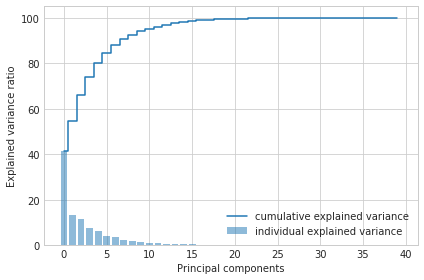

In [258]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(40), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.step(range(40), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [259]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(40,1),
                      eig_pairs[1][1].reshape(40,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.08877842 -0.27815561]
 [-0.13248863 -0.27844695]
 [-0.16985895 -0.13332317]
 [-0.17246486  0.16941997]
 [-0.196777    0.04849937]
 [-0.19026511  0.15702722]
 [-0.18438774  0.15846595]
 [-0.14762748  0.10954487]
 [-0.1625256  -0.16147067]
 [-0.15682088 -0.11960794]
 [-0.15543464 -0.04232001]
 [-0.18368275  0.10431566]
 [-0.17727561 -0.07224165]
 [-0.18135155 -0.03099098]
 [-0.19426413  0.00529515]
 [-0.12364459 -0.00635934]
 [ 0.15545544  0.17087384]
 [ 0.16255662  0.12299479]
 [ 0.15569386  0.03898725]
 [ 0.15221094 -0.08741908]
 [ 0.17021723  0.0906314 ]
 [ 0.18069913  0.06071713]
 [ 0.20139709 -0.01428044]
 [ 0.10675321 -0.03419407]
 [-0.06700926 -0.27060621]
 [-0.09758135 -0.29209891]
 [-0.11393388 -0.18963135]
 [-0.14777057  0.15976533]
 [-0.16925285  0.10834386]
 [-0.13946013  0.21066091]
 [-0.13168229  0.22331431]
 [-0.13784705  0.12627645]
 [-0.08866733 -0.2782005 ]
 [-0.13240826 -0.27841604]
 [-0.16988743 -0.13360255]
 [-0.17208424  0.16995359]
 [-0.1964353   0.

In [260]:
#y = data_df.iloc[:,-1]
y = feature_df.iloc[:,-1]
#y == False

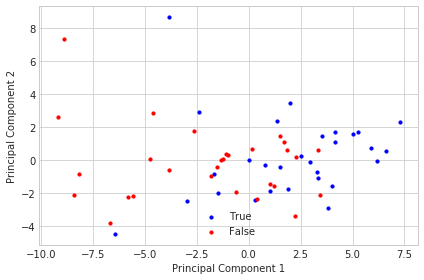

In [266]:
Y = X_std.dot(matrix_w)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, color in zip((True, False),
                        ('blue', 'red')):
        
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=color,
                    s=10)
                   
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

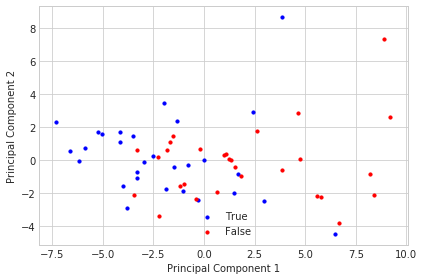

In [267]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((True,False),
                        ('blue','red')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col,
                    s=10)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()